<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center">Segmenting an online retail company's customers</h1>

<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center"> Part III: Online retail market segmentation returns transactions (credit invoices)</h1>

<div class="alert alert-block alert-info">
<b> </b> </div>

# Collect the Data

## Importing the Python Packages

import the required Python packages.

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from matplotlib import pyplot as plt
from IPython.display import display, HTML
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set_theme()
sns.set(font_scale=2)
sns.set(rc={"figure.figsize":(12, 8)}) #width=6, height=5
from scipy.stats import pearsonr # import pearsonr function to calculate  Pearson correlation coefficient

Import the data into a dataframe called `dfc`.

In [2]:
dfc = pd.read_excel("C:/Users/ke337467/OneDrive - Oxfordshire County Council/Data Scientist Apprenticeship/Module Portfolio - Data Science Professional Practice/Retail_Market/Returns_Data.xlsx")

Drop the original index colummn as it is duplicated on import. 

In [3]:
dfc = dfc.drop(['Unnamed: 0'], axis=1)
dfc.head()

,CustomerID,Amount,Frequency,Recency,Amount_S,Frequency_S,Recency_S
0,12352,960.63,3,263,-0.038361,-0.030983,-1.150009
1,12359,127.05,2,8,-0.127213,0.526358,-1.114091
2,12362,71.65,3,12,0.272206,-0.588324,1.400148
3,12365,320.69,1,292,-0.238792,-0.588324,-1.194906
4,12375,2.08,1,3,-0.239001,-0.588324,0.178946


Drop the CustomerID as it will influence the statistial measures. See warning below

<div class="alert alert-block alert-danger">
<b>Warning:</b> It is important to remove the `CustomerID` as this is a numerical field and can negatively influence the statistical measures used to calculate the number of clusters.
</div>

In [4]:
dfcs = dfc.drop(['Amount','Frequency','Recency','CustomerID'], axis=1)
dfcs.head()

,Amount_S,Frequency_S,Recency_S
0,-0.038361,-0.030983,-1.150009
1,-0.127213,0.526358,-1.114091
2,0.272206,-0.588324,1.400148
3,-0.238792,-0.588324,-1.194906
4,-0.239001,-0.588324,0.178946


## Viual exploration of the dataset 

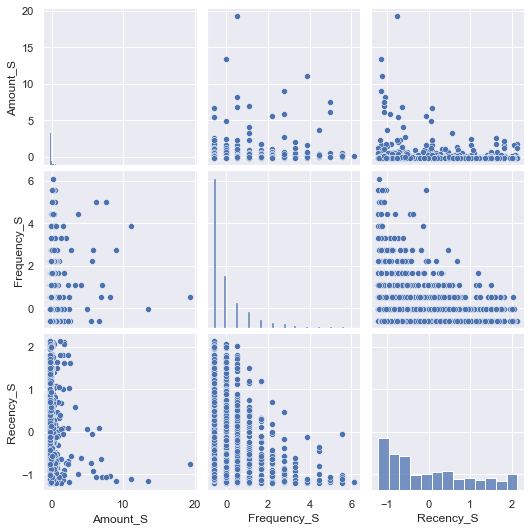

In [5]:
sns.pairplot(dfcs[['Amount_S','Frequency_S','Recency_S']])

<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center">Cluster Analysis of online retail returns (credit invoices)</h1>

<div class="alert alert-block alert-info">
<b> </b> </div>

## The standardised values in Amount, Frequency and Recency.

In [6]:
dfcs.describe().round(2)

,Amount_S,Frequency_S,Recency_S
count,1542.00,1542.00,1542.00
mean,-0.01,-0.00,-0.00
std,0.95,0.99,1.00
min,-0.24,-0.59,-1.21
25%,-0.22,-0.59,-0.90
50%,-0.19,-0.59,-0.26
75%,-0.11,-0.03,0.69
max,19.26,6.10,2.14


Reviewing the data frame above note that `Amount`, `Frequency` and `Recency` have a standard deviation of one and a mean of zero. (The approach is Z-score normalization).

<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center">Statistically choosing the right number of clusters</h1>

<div class="alert alert-block alert-info">
<b> </b> </div>

## Using statistical measures to calculate the appropriate number of clusters

>* Within Cluster Sum of Squares (WCSS)  
>* Average Silhouette Score  
>* Calinski Harabasz Score  

### The Within Cluster Sum of Squares (WCSS)
This approach is also known as the `Elbow method`  

Approach used:
>* Create and empty list `wcss`
>* Iterate values for k from 2 to 10. (*Note:* stop value in the range function, 11 is exclusive)
>* For each `k`, cluster the data (as done in `Section 6.1` and `6.1.1.` but note that the value for the number of clusters is `k`).
>* The second last step in the iteration `(kmeans.inertia_)` calculates the `wcss value` for each iteration
>* The last step in the iteration appends the `wcss value` to the `wcss` list.

**Note:** after irritating all nine k values, the `wcss` list will contain the `wcss value` for each `k` in the list.

* When the loop is completed convert the wcss list into a Pandas Series

Create a line plot with
* y-axis = wcss
* x-axis = k values

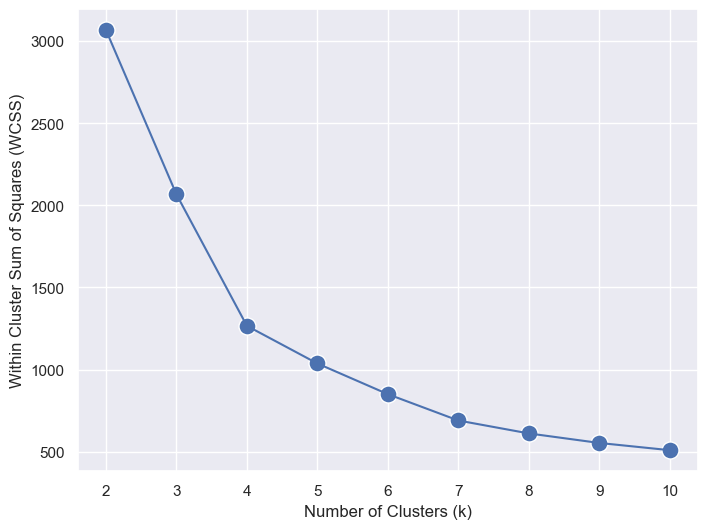

In [7]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    kmeans.fit(dfcs)
    wcss.append(kmeans.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

#### Observation

Examining the plot the elbow starts at `k = 4` and possibly `k = 5` could also be relevant. 

### The Average Silhouette Score

Approach used:  
>* Create and empty list `silhouette`
>* Iterate values for k from 2 to 10. (Note: stop value in the range function, 11 is exclusive)
>* For each k, cluster the data (as done in Section 5.1 and 5.1.1. but note that the value for the number of clusters is `k`)
>* The second last step in the iteration `( silhouette_score)` calculates the average `silhouette_score` for each k during each iteration
>* The last step in the iteration appends the `silhouette_score`.

**Note:** after irritating all nine k values, the `silhouette` list will contain the `silhouette_score` for each k in the list.

* When the loop is completed convert the `silhouette` list into a Pandas Series

Create a line plot with:
* y-axis = silhouette score
* x-axis = k values

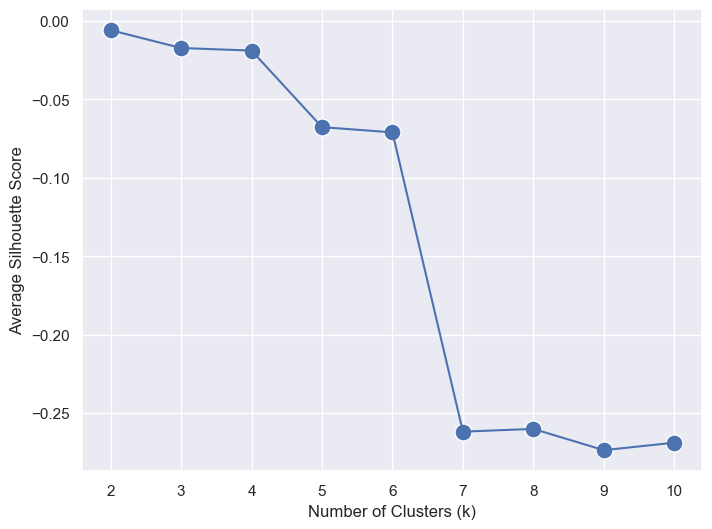

In [8]:
silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    kmeans.fit(dfcs)
    silhouette.append(silhouette_score(dfc, kmeans.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

#### Observations

With the average silhouette method, the k value corresponding to the highest average silhouette score represents the optimal number of clusters. 

<div class="alert alert-block alert-warning">
<b>Note:</b> Upon examining the chart, it is evident that the values reach their peak when `k = 2`. This `k` value differs from the `WCSS k value`, which indicated the elbow at `k = 4` and possibly `k = 5`.
</div>

Additionally, utilizing only two clusters would not align with the sales clustering, nor would it facilitate a more diversified profile of customers who return or cancel orders. Although `k = 2` yields the highest score, `k = 3` and `k = 4` are only marginally lower. Therefore, for this exercise, `k = 4` is deemed an appropriate number of clusters to use. We will also model `k = 3` to validate the decision to use `k = 4`.

### The Calinski Harabasz Score

Approach used:  
>* Create and empty list `chs`
>* Iterate values for k from 2 to 10. (Note: stop value in the range function, 11 is exclusive)
>* For each k, cluster the data (as done in Section 6.1 and 6.1.1. but note that the value for the number of clusters is `k`)
>* The second last step in the iteration `( calinski_harabasz_score)` calculates the `calinski_harabasz_score` for each k during each iteration
>* The last step in the iteration appends the `calinski_harabasz_score` to the list `chs`

**Note:** after irritating all nine k values, the `chs` list will contain the `calinski_harabasz_score` for each k in the list.

* When the loop is completed convert the `chs` list into a Pandas Series

Create a line plot with
* y-axis = Calinski Harabasz Score
* x-axis =  k values

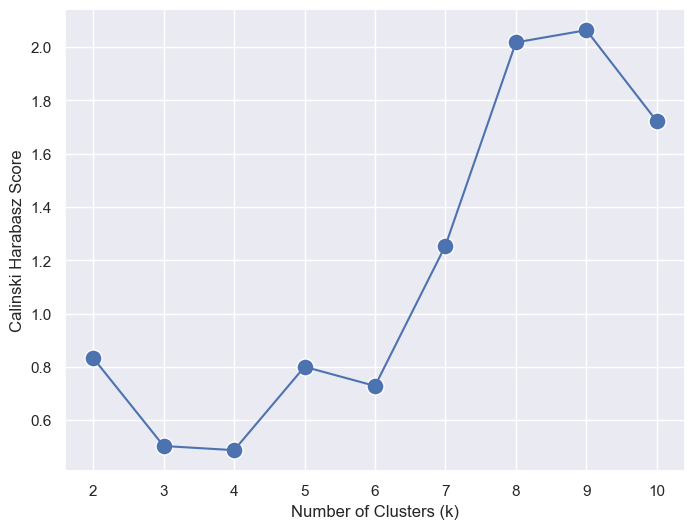

In [9]:
chs = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    kmeans.fit(dfcs)
    chs.append(calinski_harabasz_score(dfc, kmeans.labels_))

calinski_series = pd.Series(chs, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')

#### Observations

Using the Calinski-Harabasz score, the optimal value for k is that which corresponds to either the highest score or the first abrupt elbow in the chart. 

* The first abrupt elbow is when `k = 3` or `k = 4`
* The highest score is when `k = 9`.

## Conclusion: Optimal number of clusters
Results of the three tests
>* Within Cluster Sum of Squares (WCSS): `k = 4` or possibly `k = 4`.
>* Silhouette Score: `k = 3` or`k = 4`.
>* Calinski-Harabasz score: `k = 3 or 4`.

Based on the `Silhouette`, `WCSS`, and `Calinski-Harabasz` scores, it is evident that the optimal number of clusters is either three or four.

Although the `optimal k value` is not consistent across all three tests, it is likely to be `k = 4` or possibly `k = 3`. For further details, please refer to Annex 3 (at the end of this notebook), where three clusters `k = 3` were utilized. The use of three clusters was primarily a learning exercise to explore the clustering outcomes with three clusters. However, employing three clusters would misalign with the clustering of sales transactions, which was modeled using four clusters.

<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center">Create the Clusters using k = 4</h1>

<div class="alert alert-block alert-info">
<b> </b> </div>

To cluster the data using k-means clustering use the k-means class from the sklearn.cluster subpackage.

## Setting up the k-means clustering algorithm

Create a new object called `kmeans` from the k-means class.  
k-means requires three arguments:  
>1). ` n_clusters` argument determines the number of clusters. The estimated correct number of clusters based on the three tests above (`WCSS`, `Silhouette` and `Calinski-Harabasz`) is initially set `k = 5`, but changed to `k = 4` (please see `8.3. Evaluation of the centroid scatterplot (with k = 5)`for more details as why 4 cnetroids were chosed rather than 5.   
>2). ` n_init` this argument sets the number of times the k-means algorithm should be run with different central seeds. The default is 10. Set it to 25 (just to be sure).   
>3). `random_state` this argument sets the random initialisation seed which will be used to generate the cluster centres to 1, 2, 3, 4. Using this argument enables the reproduction of the results.  

In [10]:
kmeans = KMeans(n_clusters = 4, n_init = 25, random_state = 1234)

#### Use the fit method
Use the fit method of the kmeans object to cluster the data. 

In [11]:
kmeans.fit(dfcs)

KMeans(n_clusters=4, n_init=25, random_state=1234)

#### Assign reference labels
*  Get `cluster assignments` reference the labels attributes of the km object.  
* Cluster assignments correspond to the order of instances in the customer scale data set.  
* Output is a NumPy array of cluster assignments. 

In [12]:
kmeans.labels_

array([0, 0, 2, ..., 0, 2, 0])

#### Notes about labels
Cluster assignments correspond to the order of instances in the customer scale data frame. 
For example:
>* first item in the output array (also the first item in the dataset) is assigned to cluster 0
>* second last item is assigned to cluster 2
>* the last item in the array is in cluster 0.

### Using the inertia_ attribute in the k-means sub package
The output of this code is the total `WCSS (within-cluster sum of squares)` for the clusters.

In [13]:
kmeans.inertia_

1265.7594583100333

## Evaluate and Visualise the Clusters 
Count the number of items in each cluster

In [14]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0    760
1    212
2    556
3     14
dtype: int64

### Comparing cluster size
Cluster 3 is disproportionately smaller than the other two clusters and will need further attention bring more balance to the clusters.  
It is possible that the initial number of clusters is not appropriate for this data set.
The centre of each cluster will provide useful information about the quality of the clusters.

### Return the coordinates of the centroids
The cluster_centers attribute returns the coordinates of the centroids (cluster centres) as a NumPy array.

In [15]:
kmeans.cluster_centers_

array([[-0.11663984, -0.25318626, -0.64020222],
       [ 0.13774515,  1.95914504, -0.6949386 ],
       [-0.12630941, -0.44798656,  1.15419875],
       [ 8.33762007,  1.64104   , -0.76261103]])

#### Create a data frame for the cluster centroids
Create a data frame for the cluster centroids called `cluster_centers`.

In [16]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['Amount','Frequency','Recency'])
cluster_centers

,Amount,Frequency,Recency
0,-0.116640,-0.253186,-0.640202
1,0.137745,1.959145,-0.694939
2,-0.126309,-0.447987,1.154199
3,8.337620,1.641040,-0.762611


#### Understanding the coordinates of the centroids
  
The *Z-score* approach was used to standardise the data therefore the  coordinates for the average income and average spending score will be zero.  
**Z-score normalisation** is the process of normalising every value in a feature so that the average (mean) of all the feature’s values equals zero and the standard deviation is one.  
  
(*Source Z-score normalisation:* https://www.statology.org/z-score-normalization/)
  
**First Cluster:** Analyzing the data for the first cluster `(labelled 0)` reveals that customers in this cluster return or cancel orders valued below the average `(Amount = -0.116640)`. They also return or cancel orders less frequently than average `(Frequency = -0.253186)`, and their returns are less recent than average `(Recency = -0.640202)`.

**Second Cluster:** The data for the second cluster `(labelled 1)` indicates that customers in this cluster return or cancel orders valued significantly above the average `(Amount = 0.137745)`. They exhibit the highest frequency of returns or cancellations compared to other clusters `(Frequency = 1.959145)`, although their returns are less recent than those of most other customers `(Recency = -0.694939)`.

**Third Cluster:** The data for the third cluster `(labelled 2)` shows that customers in this cluster return or cancel orders the least compared to other clusters `(Amount = -0.126309)`. They also have the lowest frequency of returns or cancellations `(Frequency = -0.447987)`, but their returns are more recent than those of any other cluster `(Recency = 1.154199)`.

**Fourth Cluster:** The data for the fourth cluster `(labelled 3)` indicates that customers in this cluster return or cancel orders valued significantly higher than those in any other cluster `(Amount = 8.337620)`. They return or cancel orders much more frequently than average, though not as frequently as customers in cluster 1 `(Frequency = 1.641040)`. However, these returns are the least recent among all clusters `(Recency = -0.762611)`.

#### Visualise the clusters and cluster centroids with scatter plots.

##### In this scatter plot Amount and Frequency are used

Parameters for the first scatter plot - customer scale data:  
x = `Amount`  
y = `Frequency`   
hue = `cluster labels`   
size of plot points s = 10  

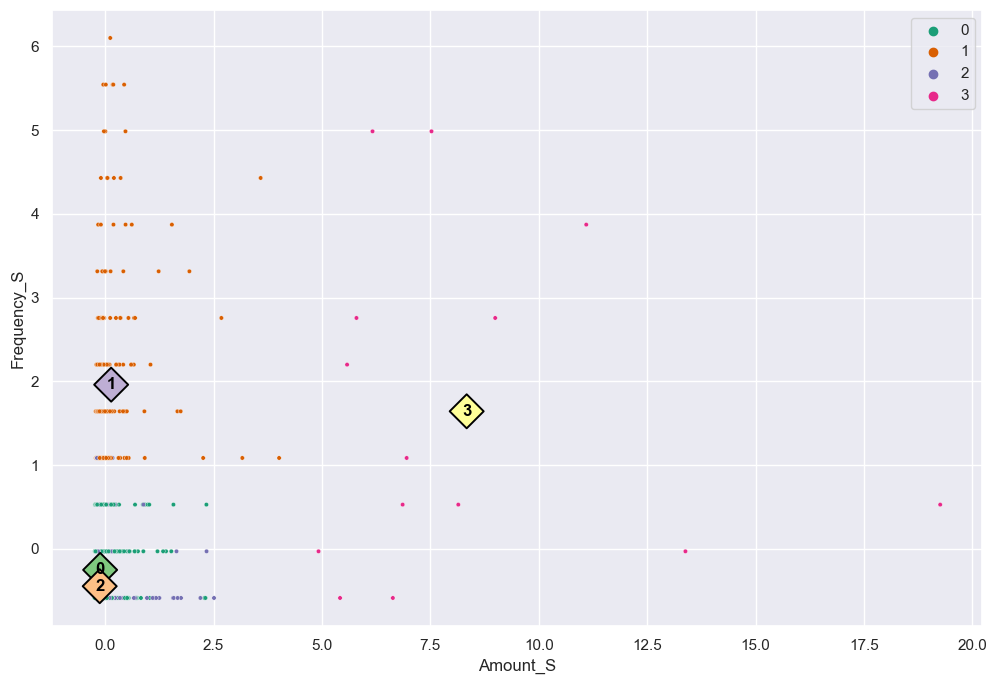

In [17]:
#Plot the Clusters
ax = sns.scatterplot(data = dfcs,
                     x = 'Amount_S',
                     y = 'Frequency_S', 
                     hue = kmeans.labels_, 
                     palette= 'Dark2',
                     s = 10,
                     legend = True)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Amount',
                     y = 'Frequency', 
                     hue = cluster_centers.index, 
                     palette = 'Accent', 
                     s = 300,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Amount[i], 
                        y = cluster_centers.Frequency[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 12,
                        weight = 'bold',
                        color = 'black')

### Visualise the clusters and cluster centroids with scatter plots.

##### In this scatter plot Amount and Recency are used

Parameters for the first scatter plot - customer scale data:  
x = `Amount`  
y = `Recency`   
hue = `cluster labels`   
size of plot points s = 10  

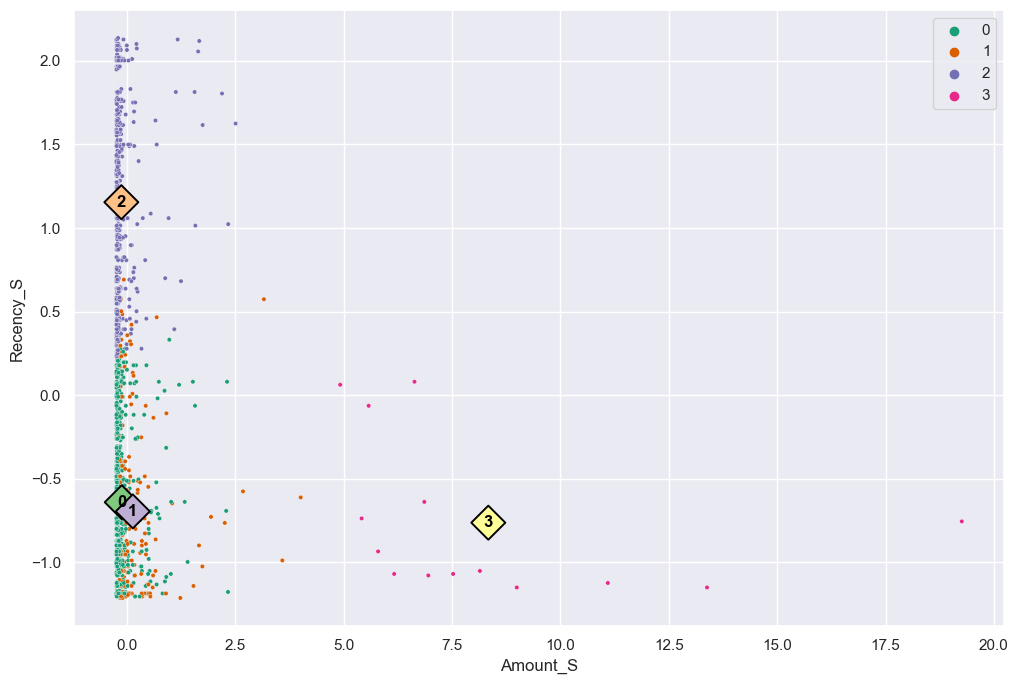

In [18]:
#Plot the Clusters
ax = sns.scatterplot(data = dfcs,
                     x = 'Amount_S',
                     y = 'Recency_S', 
                     hue = kmeans.labels_, 
                     palette= 'Dark2',
                     s = 10,
                     legend = True)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Amount',
                     y = 'Recency', 
                     hue = cluster_centers.index, 
                     palette = 'Accent', 
                     s = 300,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Amount[i], 
                        y = cluster_centers.Recency[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 12,
                        weight = 'bold',
                        color = 'black')

Count the number of items in each cluster

In [19]:
pie1 = pd.Series(kmeans.labels_).value_counts().sort_index()
pie1

0    760
1    212
2    556
3     14
dtype: int64

<div class="alert alert-block alert-info">
<b> </b> </div>

 <h1 style="text-align: center">Evaluation of the four centroid clustering (with k = 4)</h1>

<div class="alert alert-block alert-info">
<b> </b> </div>

  <h1 style="text-align: center">Four Segments Total Customers who return or cancel orders = 1,542</h1>

<table style="float: center">
<thead>
<tr><th>Cluster Number</th><th>Assigned</th><th>Percentage</th></tr>
</thead>
<tbody>
<tr><td>0</td><td>760</td><td>49.3%</td></tr>
<tr><td>1</td><td>212</td><td>13.7%</td></tr>
<tr><td>2</td><td>556</td><td>36.1%</td></tr>
<tr><td>3</td><td>14</td><td>0.9%</td></tr>
</tbody>
</table> 

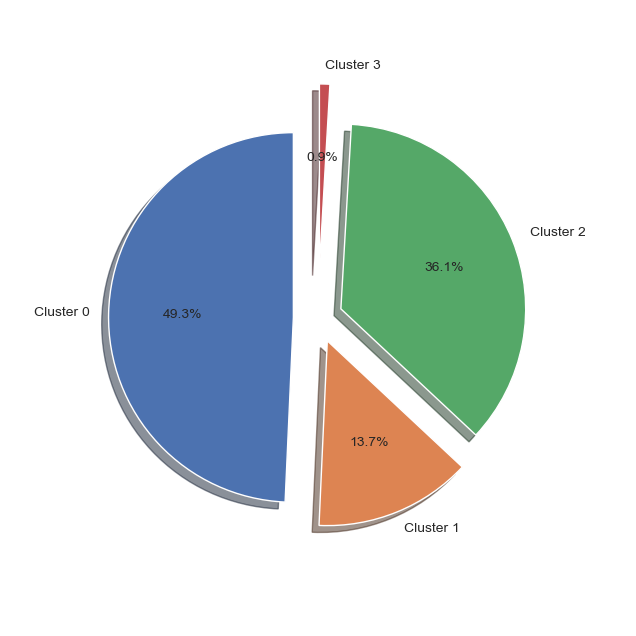

In [20]:
explode = (0.1, 0.1, 0.1, 0.2)
labels = 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'
fig, ax = plt.subplots()
ax.pie(pie1, explode=explode, labels=labels, autopct='%1.1f%%',
       textprops={'size': 'smaller'}, radius=0.75,
       shadow=True, startangle=90)
plt.show()

## Cluster Analysis (four centroid model)

##### Cluster 0 
`Cluster 0` is the largest of the four clusters, comprising `760 customers`. Customers within this cluster tend to return or cancel orders valued slightly above the median. Additionally, they exhibit a highest frequency of returns or cancellations compared to the average, and their returns are less recent than those of other clusters. (Profile: Lost_frequent)
  
##### Cluster 1 
`Cluster 1`, consisting of `212 customers`, is the second smallest cluster, being less than half the size of cluster 2 and less than a third of cluster 0. Customers in this cluster return or cancel orders with values significantly above the median. They demonstrate the second highest frequency of returns or cancellations among all clusters, although their returns are less recent compared to most other customers.(Profile: Lost_HighValue)
  
##### Cluster 2
`Cluster 2` is the second largest cluster, with `556 customers`, which is more than twice the size of cluster 1 but approximately one-third smaller than cluster 0. 
Customers in this cluster return or cancel orders valued the least and exhibit the second highest frequency of returns or cancellations. However, their returns are the least recent among all clusters.(Profile: Unhappy)

##### Cluster 3
`Cluster 3` is the smallest cluster, comprising only `14 customers`, which is a fraction of the size of any other cluster. Despite its small size, this cluster possesses unique and concerning characteristics that warrant the attention of the online retailer. Customers in this cluster return or cancel orders with `values significantly higher than those in any other cluster`. They return or `cancel orders less frequently than any other cluster`, though not as frequently as customers in cluster 1. Notably, these returns are the most recent among all clusters. (Profile: Unhappy_High)

## Cluster Analysis: Comparing the four clusters with the three cluster model)

Although the optimal `k` value is not consistent across all three statistical tests to determine the ideal number of clusters, it is likely to be `k = 4` or possibly `k = 3`. For further details, please refer to `Annex 3` (at the end of this notebook), where a three-centroid model `k = 3` was utilized. The use of three centroids was primarily a learning exercise to explore the clustering outcomes between three and four centroid models. However, employing three centroids for returns would misalign with the clustering of sales, which uses four centroids.

Furthermore, the evaluation of the three-centroid model returned disappointing results. Cluster 2 consists of only 16 customers, which is two more than Cluster 3 in the four-centroid model. Cluster 0 consists of 59%, and Cluster 1 consists of 40% of customers who return or cancel orders. The distribution of customers was better using the four-centroid model. The advantage of running the three-centroid models is that the results validate the decision to use the four-centroid model, which in turn matches the four centroids used in the sales transaction model.
    
#### Three cluster model
Statistically the three centroid model could be an appropriate number of clusters. However when running the three centroid model the results were not as evenly distributed as anticipated.
<table style="float: left">
<thead>    
<tr><th> Cluster</th><th> Assigned </th><th> Percentage </th></tr>
</thead>
<tbody>
<tr><td>0</td><td>909</td><td>59%</td></tr>
<tr><td>1</td><td>617</td><td>40%</td></tr>
<tr><td>2</td><td>16</td><td>1%</td></tr>
</tbody>
</table>  

`Cluster 2` is disappointedly smaller and the other two clusters with `Cluster 0` be disproportionately larger than the rest. Considering the project objectives this would not provide the online retailer with sufficient customer segments or provide a more nuanced explanation of customer return or order cancellation habits. 

## Assigning cluster numbers to the original data

* Create a new column in the dataset to hold the cluster assignment.
* Assign the cluster numbers to the customers in the original data frame.
* Drop the standardised columns 'Amount_S, 'Frequency_S', and 'Recency_S' as they are no longer required in the data frame.
* The next step is the analyze the the characteristics of each segment.

In [21]:
dfc['Returns_Cluster'] = kmeans.labels_.tolist()
dfc = dfc.drop(['Amount_S', 'Frequency_S', 'Recency_S'], axis=1)
dfc.sample(5)

,CustomerID,Amount,Frequency,Recency,Returns_Cluster
429,13881,170.00,2,29,1
78,12585,57.29,2,240,2
70,12569,59.70,3,24,0
1178,16686,19.35,2,306,2
1084,16292,21.35,1,118,0


In [22]:
total_value_returns = dfc['Amount'].sum()
Cluster_3_return_amount = dfc[dfc['Returns_Cluster'] == 3]['Amount'].sum().round(2)
Percentage_returns = round(Cluster_3_return_amount/total_value_returns * 100,2)
print(f"Total amount of all returns: {total_value_returns:,}")
print(f"Total amount of Cluster 3 returns: {Cluster_3_return_amount:,}")
print(f"Percentage cluster 3 returns (Amount) is {Percentage_returns}%")

Total amount of all returns: 235,350.81
Total amount of Cluster 3 returns: 1,639.43
Percentage cluster 3 returns (Amount) is 0.7%


## Conclusion of cluster modelling

The evaluation of the four-centroid model  `k = 4` reveals distinct customer clusters with better distribution than the three-centroid model .   
`Cluster 0`, the largest with 760 customers, comprises individuals whose returns are valued below the average, who return or cancel orders less frequently, and whose returns are less recent than the average.(Profile: Unhappy less frequent and less recent returns).      
`Cluster 1`, a smaller cluster with 212 customers, includes individuals who return or cancel orders valued significantly above the average and exhibit the highest frequency of returns, although their returns are less recent.  (Profile: Lost high value high frequency returns). 
`Cluster 2` is the second largest cluster, with 556 customers. Customers in this cluster exhibit the lowest frequency of returns or cancellations among all clusters. However, their returns are more recent than those of any other cluster.  (Profile: Unhappy recent returns). 
`Cluster 3` is the smallest cluster, comprising only 14 customers, which is a fraction of the size of any other cluster. Despite its small size, this cluster possesses unique and concerning characteristics that warrant the attention of the online retailer. Customers in this cluster return or cancel orders with values significantly higher than those in any other cluster. They return or cancel orders more frequently than the average, though not as frequently as customers in Cluster 1. Notably, these returns are the least recent among all clusters.  (Profile:Unhappy high value returns). 
  
However, when the value of Cluster 3 is calculated in monetary terms, the context and value of this segment are questionable. The total value of all returns is `235,350.81`, while the total value of the returns in Cluster 3 is `1,639.43`, representing only `0.7% of all returns`. Despite these limitations, the `four-centroid model remains the most sensible choice as it provides `a more even distribution of customers` compared to the three-centroid model.


### Return descriptive statistics for each feature in the four centroid model

In [23]:
dfc.agg({
    'Amount': 'median',
    'Frequency': 'mean',
    'Recency': 'median'}).round(2)

Amount        30.78
Frequency      2.06
Recency      107.00
dtype: float64

### Return descriptive statistics for each cluster in the four centroid model
Return descriptive statistics for each features, but grouped by cluster.

In [24]:
dfg = dfc.groupby('Returns_Cluster').agg({
    'Amount': 'median',
    'Frequency': 'mean',
    'Recency': 'median'}).round(2)
dfg

,Amount,Frequency,Recency
Returns_Cluster,,,
0,30.95,2.04,101.0
1,31.44,2.08,102.0
2,30.12,2.09,108.0
3,40.60,1.86,96.5


## Conclusion
By comparing the median statistics of each feature with the median statistics of each cluster, a more nuanced understanding of the customer profiles within each cluster is achieved, as discussed below:

* **Cluster 0:** This cluster comprises customers who return or cancel orders valued slightly above the median and exhibit the highest frequency of returns, although their returns are less recent.
* **Cluster 1:** This cluster includes customers who return or cancel orders valued significantly above the median and exhibit the second highest frequency of returns, although their returns are less recent.
* **Cluster 2:** Customers in this cluster return or cancel orders valued the least and exhibit the second highest frequency of returns or cancellations. However, their returns are the least recent among all clusters.
* **Cluster 3:** Customers in this cluster return or cancel orders with values significantly higher than those in any other cluster. They return or cancel orders less frequently than any other cluster, and these returns are the most recent among all clusters.

## Recommendations for corrective action
* **Cluster 0:** Customers in this cluster may be considered lost, as their returns are higher and more frequent than average, and they have not returned any orders recently. It is recommended to implement a promotion or survey to attempt to re-engage these customers.
* **Cluster 1:** Similar to Cluster 0, customers in this cluster may also be lost. Their returns are less recent, but the value of returned orders is significantly higher, and they exhibit the second highest frequency of returns. This cluster represents high-value customers who may be dissatisfied or lost. It is advisable to reach out with a promotion or customer service correspondence to address their concerns.
* **Cluster 2:** Customers in this cluster have the least recent return orders of low value but exhibit the second highest frequency of returns. These customers may be unhappy, and it is recommended to reach out with personalized customer service correspondence to address their issues.
* **Cluster 3:** Customers in this cluster return or cancel orders with values significantly higher than those in any other cluster, and these returns are the most recent among all clusters. It is recommended to reach out to these customers with a promotional discount and a personalized message from the CEO.

The online retailer should consider engaging with customers in Clusters 1, 2, and 3, as they are recent customers who may still be purchasing products. It is crucial to understand why customers in Clusters 1 and 3 are returning high-value orders. Clusters 1 and 3 require urgent senior management attention, as these clusters represent customers who are returning the highest value orders with higher frequency and recency.

## Export market segmentation returns transactions to Excel

In [25]:
dfc.to_excel('Credit_Cluster.xlsx', sheet_name='Credit_Cluster', index=True)

<div class="alert alert-block alert-info">
<b> </b> </div>

# END Part III market segmentation returns transactions(Credit Invoices)

<div class="alert alert-block alert-info">
<b> </b> </div>

#### See Part I for the market segmentation ETL and EPA processes
https://github.com/andrewcollodel/Data-Science-Portfolio/blob/main/1_PART_I_Online_Retail_Market_Segmentation_ETL_EPA.ipynb
#### See Part II for market segmentation of sales transactions
https://github.com/andrewcollodel/Data-Science-Portfolio/blob/main/2_PART_II_Online_Retail_Market_Segmentation_Sales.ipynb
#### See Part IV for the Analysis of customer purchasing habits and proposed action plan
https://github.com/andrewcollodel/Data-Science-Portfolio/blob/main/4_PART_IV_Online_Retail_Market_Segmentation_Summary.ipynb

<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center">Annex 3: Returns/canceled transactions (credit invoices) with 3 clusters</h1>

<div class="alert alert-block alert-info">
<b> </b> </div>

## Evaluation of the three centroid clustering (with k = 3)
The goal of this project is to conduct a market segmentation of an online retailer’s customers and develop customer profiles based on the purchasing and returns habits. 

Three clusters returned an unbalanced spread of customers per cluster with three quaters of the customers in cluster 0. The four clusters still provides the best customer distribution to meet the project objectives.

  <h1 style="text-align: center"> Three Segments Total Customers = 1,542 </h1>

<table style="float: center">
<thead>    
<tr><th> Cluster Number </th><th> Assigned </th><th> Percentage </th></tr>
</thead>
<tbody>
<tr><td>0</td><td>909</td><td>59%</td></tr>
<tr><td>1</td><td>617</td><td>40%</td></tr>
<tr><td>2</td><td>16</td><td>1%</td></tr>
</tbody>
</table>

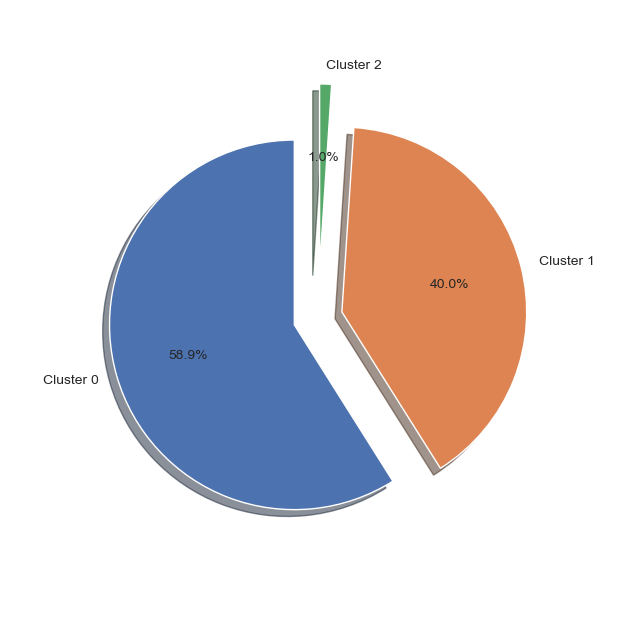

In [26]:
pie2 = [909,617,16]
explode = (0.1, 0.1, 0.2)
labels4 = 'Cluster 0', 'Cluster 1', 'Cluster 2'
fig, ax = plt.subplots()
ax.pie(pie2, explode=explode, labels=labels4, autopct='%1.1f%%',
       textprops={'size': 'smaller'}, radius=0.75,
       shadow=True, startangle=90)
plt.show()

In [27]:
kmeans4 = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

In [28]:
kmeans4.fit(dfcs)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [29]:
kmeans4.labels_

array([0, 0, 1, ..., 0, 1, 0])

In [30]:
kmeans4.inertia_

2066.342269037194

In [31]:
pd.Series(kmeans4.labels_).value_counts().sort_index()

0    909
1    617
2     16
dtype: int64

In [32]:
kmeans4.cluster_centers_

array([[-0.06588053,  0.27497193, -0.70375438],
       [-0.12541974, -0.45644126,  1.0521332 ],
       [ 7.77023318,  1.78037527, -0.76726109]])

In [33]:
cluster_centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns = ['Amount','Frequency','Recency'])
cluster_centers4

,Amount,Frequency,Recency
0,-0.065881,0.274972,-0.703754
1,-0.125420,-0.456441,1.052133
2,7.770233,1.780375,-0.767261


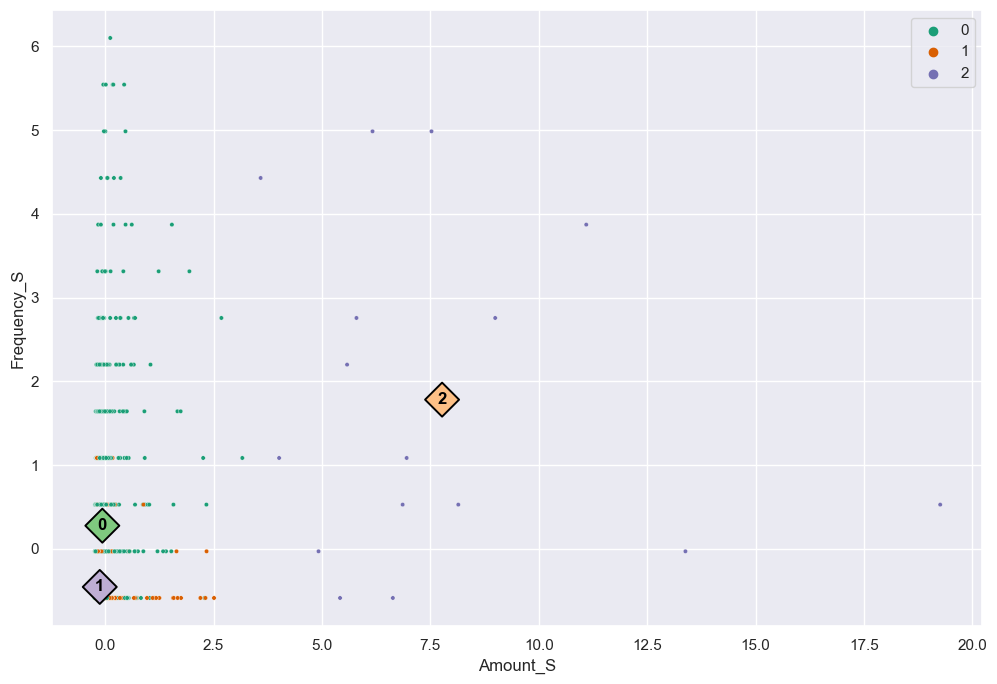

In [34]:
#Plot the Clusters
ax = sns.scatterplot(data = dfcs,
                     x = 'Amount_S',
                     y = 'Frequency_S', 
                     hue = kmeans4.labels_, 
                     palette= 'Dark2',
                     s = 10,
                     legend = True)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers4, 
                     x = 'Amount',
                     y = 'Frequency', 
                     hue = cluster_centers4.index, 
                     palette = 'Accent', 
                     s = 300,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers4)):
               plt.text(x = cluster_centers4.Amount[i], 
                        y = cluster_centers4.Frequency[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 12,
                        weight = 'bold',
                        color = 'black')

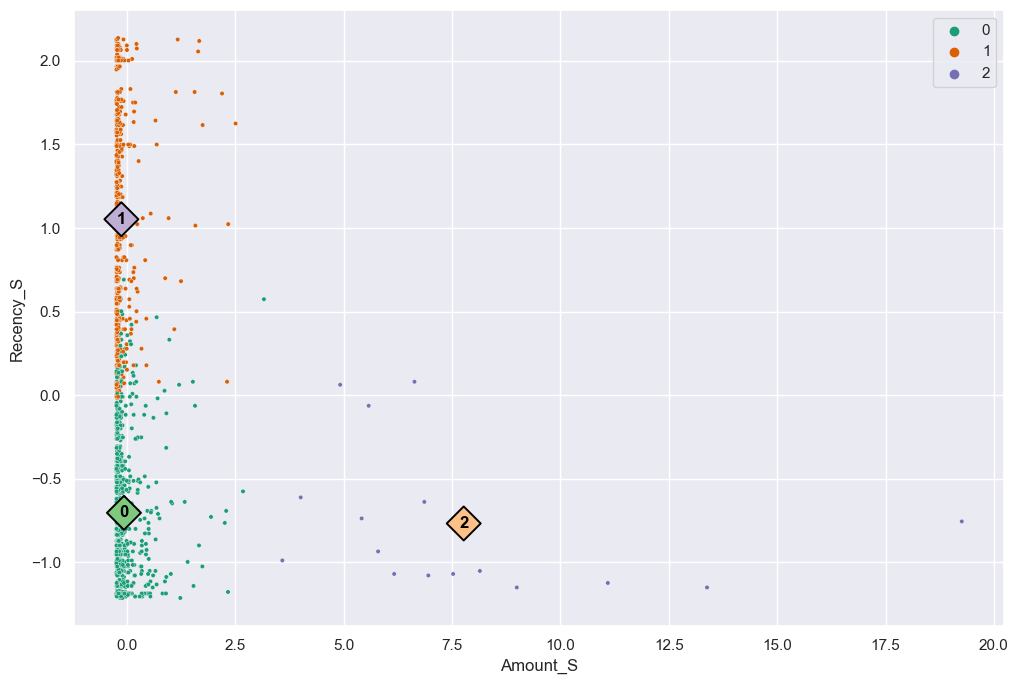

In [35]:
#Plot the Clusters
ax = sns.scatterplot(data = dfcs,
                     x = 'Amount_S',
                     y = 'Recency_S', 
                     hue = kmeans4.labels_, 
                     palette= 'Dark2',
                     s = 10,
                     legend = True)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers4, 
                     x = 'Amount',
                     y = 'Recency', 
                     hue = cluster_centers4.index, 
                     palette = 'Accent', 
                     s = 300,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers4)):
               plt.text(x = cluster_centers4.Amount[i], 
                        y = cluster_centers4.Recency[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 12,
                        weight = 'bold',
                        color = 'black')

<div class="alert alert-block alert-info">
<b> </b> </div>

# END

<div class="alert alert-block alert-danger">
<b> </b> </div>